## ⚡ Instalación de Dependencias (Ejecutar primero)

Para usar este notebook, necesitas instalar las bibliotecas requeridas. Ejecuta la siguiente celda:

In [1]:
!pip install -q nltk spacy pandas matplotlib seaborn

# Descargar modelo de Spacy
import subprocess
import sys
subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm", "-q"])

print("✅ Todas las dependencias instaladas correctamente")


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Todas las dependencias instaladas correctamente


## 1. Importar Librerías Necesarias

In [2]:
"""
CONFIGURACIÓN INICIAL: Importación de librerías
================================================
⚠️ IMPORTANTE: Configuración SSL para evitar errores en macOS
En algunos sistemas, NLTK tiene problemas con certificados SSL.
Esta configuración debe hacerse ANTES de cualquier operación con NLTK.
"""

# Configurar SSL PRIMERO (antes de importar NLTK)
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Ahora importar todas las librerías necesarias
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, pos_tag_sents
from nltk.corpus import wordnet
import pandas as pd
import seaborn as sns
from src.utils import path
from tqdm import tqdm
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías importadas correctamente")
print("✓ Configuración SSL aplicada")

✓ Librerías importadas correctamente
✓ Configuración SSL aplicada


In [3]:
print("Cargando recursos de NLTK ...\n")

# Intentar descargar recursos de NLTK de forma silenciosa
try:
    nltk.data.find('tokenizers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng', quiet=True)

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', quiet=True)

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)

try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger', quiet=True)

try:
    nltk.data.find('taggers/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)

try:
    nltk.data.find('taggers/wordnet')
except LookupError:
    nltk.download('wordnet', quiet=True)

print("✓ Recursos de NLTK listos")
print("\n" + "="*60)
print("¡Listo para comenzar con el POS Tagging!")
print("="*60)

Cargando recursos de NLTK ...

✓ Recursos de NLTK listos

¡Listo para comenzar con el POS Tagging!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pmari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pmari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Carga de Corpus

In [4]:
directorio_proyecto = path.obtener_ruta_local()
df = pd.read_csv(directorio_proyecto+'\\data\\processed\\corpus_spotify.csv',delimiter = ',',decimal = ".", encoding='utf-8')
df.head()

,musico,nombre_cancion,letra_cancion
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


## 2. POS Tagging con NLTK


### Paso 1 Tokenización

In [5]:
def realizar_token(letra):
    sentences = sent_tokenize(letra)
    token = []
    for sent in sentences:
        tokens = word_tokenize(sent)
        token.append(tokens)
    return token
tqdm.pandas(desc="Paso 1 Tokenización")
df['tokens'] = df['letra_cancion'].progress_apply(realizar_token)

Paso 1 Tokenización: 100%|██████████| 57650/57650 [00:43<00:00, 1322.02it/s]


In [6]:
df

,musico,nombre_cancion,letra_cancion,tokens
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[[Look, at, her, face, ,, it, 's, a, wonderful..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[[Take, it, easy, with, me, ,, please, Touch, ..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[[I, 'll, never, know, why, I, had, to, go, Wh..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[[Making, somebody, happy, is, a, question, of..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[[Making, somebody, happy, is, a, question, of..."
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...,"[[Irie, days, come, on, play, Let, the, angels..."
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...,"[[Power, to, the, workers, More, power, Power,..."
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...,"[[all, you, need, is, something, i, 'll, belie..."
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...,"[[northern, star, am, i, frightened, where, ca..."


### Paso 2 Etiquetado POS

In [7]:
def realizar_taggins(token):
    sentences = token
    analisis = []
    for sent in sentences:
        pos_tags = pos_tag(sent)
        analisis.append(pos_tags)
    return analisis

tqdm.pandas(desc="Paso 2 Etiquetado POS")
df['Etiquetado_POS'] = df['tokens'].progress_apply(realizar_taggins)


Paso 2 Etiquetado POS: 100%|██████████| 57650/57650 [09:39<00:00, 99.44it/s] 


In [8]:
df

,musico,nombre_cancion,letra_cancion,tokens,Etiquetado_POS
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[[Look, at, her, face, ,, it, 's, a, wonderful...","[[(Look, NN), (at, IN), (her, PRP$), (face, NN..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[[Take, it, easy, with, me, ,, please, Touch, ...","[[(Take, VB), (it, PRP), (easy, JJ), (with, IN..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[[I, 'll, never, know, why, I, had, to, go, Wh...","[[(I, PRP), ('ll, MD), (never, RB), (know, VB)..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[[Making, somebody, happy, is, a, question, of...","[[(Making, VBG), (somebody, NN), (happy, JJ), ..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[[Making, somebody, happy, is, a, question, of...","[[(Making, VBG), (somebody, NN), (happy, JJ), ..."
...,...,...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...,"[[Irie, days, come, on, play, Let, the, angels...","[[(Irie, NNP), (days, NNS), (come, VBP), (on, ..."
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...,"[[Power, to, the, workers, More, power, Power,...","[[(Power, NN), (to, TO), (the, DT), (workers, ..."
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...,"[[all, you, need, is, something, i, 'll, belie...","[[(all, DT), (you, PRP), (need, VBP), (is, VBZ..."
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...,"[[northern, star, am, i, frightened, where, ca...","[[(northern, JJ), (star, NN), (am, VBP), (i, N..."


### Paso 3 Borrado de StopWords

In [9]:
stop_words = set(stopwords.words('english'))
def borrado_stopWords(pos_tags_list):
    """Elimina stopwords comunes"""
    resultado = []
    for sentence_tags in pos_tags_list:
        sentence_clean = [(word, tag) for word, tag in sentence_tags
                          if word not in stop_words]
        if sentence_clean:
            resultado.append(sentence_clean)
    return resultado

tqdm.pandas(desc="Paso 3 Borrado de StopWords")
df['StopWords'] = df['Etiquetado_POS'].progress_apply(borrado_stopWords)

Paso 3 Borrado de StopWords: 100%|██████████| 57650/57650 [00:04<00:00, 14402.07it/s]


In [10]:
df

,musico,nombre_cancion,letra_cancion,tokens,Etiquetado_POS,StopWords
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[[Look, at, her, face, ,, it, 's, a, wonderful...","[[(Look, NN), (at, IN), (her, PRP$), (face, NN...","[[(Look, NN), (face, NN), (,, ,), ('s, VBZ), (..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[[Take, it, easy, with, me, ,, please, Touch, ...","[[(Take, VB), (it, PRP), (easy, JJ), (with, IN...","[[(Take, VB), (easy, JJ), (,, ,), (please, VB)..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[[I, 'll, never, know, why, I, had, to, go, Wh...","[[(I, PRP), ('ll, MD), (never, RB), (know, VB)...","[[(I, PRP), ('ll, MD), (never, RB), (know, VB)..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[[Making, somebody, happy, is, a, question, of...","[[(Making, VBG), (somebody, NN), (happy, JJ), ...","[[(Making, VBG), (somebody, NN), (happy, JJ), ..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[[Making, somebody, happy, is, a, question, of...","[[(Making, VBG), (somebody, NN), (happy, JJ), ...","[[(Making, VBG), (somebody, NN), (happy, JJ), ..."
...,...,...,...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...,"[[Irie, days, come, on, play, Let, the, angels...","[[(Irie, NNP), (days, NNS), (come, VBP), (on, ...","[[(Irie, NNP), (days, NNS), (come, VBP), (play..."
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...,"[[Power, to, the, workers, More, power, Power,...","[[(Power, NN), (to, TO), (the, DT), (workers, ...","[[(Power, NN), (workers, NNS), (More, JJR), (p..."
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...,"[[all, you, need, is, something, i, 'll, belie...","[[(all, DT), (you, PRP), (need, VBP), (is, VBZ...","[[(need, VBP), (something, NN), ('ll, MD), (be..."
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...,"[[northern, star, am, i, frightened, where, ca...","[[(northern, JJ), (star, NN), (am, VBP), (i, N...","[[(northern, JJ), (star, NN), (frightened, VBD..."


### Paso 4 Mayúsculas / minúsculas

In [11]:
def convertir_minusculas(pos_tags_list):
    """Convierte todos los tokens a minúsculas"""
    resultado = []
    for sentence_tags in pos_tags_list:
        sentence_lower = [(word.lower(), tag) for word, tag in sentence_tags]
        resultado.append(sentence_lower)
    return resultado

tqdm.pandas(desc=" Paso 4 Mayúsculas / minúsculas")
df['pos_tags_lower'] = df['StopWords'].progress_apply(convertir_minusculas)

 Paso 4 Mayúsculas / minúsculas: 100%|██████████| 57650/57650 [00:03<00:00, 17060.85it/s]


In [12]:
df

,musico,nombre_cancion,letra_cancion,tokens,Etiquetado_POS,StopWords,pos_tags_lower
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[[Look, at, her, face, ,, it, 's, a, wonderful...","[[(Look, NN), (at, IN), (her, PRP$), (face, NN...","[[(Look, NN), (face, NN), (,, ,), ('s, VBZ), (...","[[(look, NN), (face, NN), (,, ,), ('s, VBZ), (..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[[Take, it, easy, with, me, ,, please, Touch, ...","[[(Take, VB), (it, PRP), (easy, JJ), (with, IN...","[[(Take, VB), (easy, JJ), (,, ,), (please, VB)...","[[(take, VB), (easy, JJ), (,, ,), (please, VB)..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[[I, 'll, never, know, why, I, had, to, go, Wh...","[[(I, PRP), ('ll, MD), (never, RB), (know, VB)...","[[(I, PRP), ('ll, MD), (never, RB), (know, VB)...","[[(i, PRP), ('ll, MD), (never, RB), (know, VB)..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[[Making, somebody, happy, is, a, question, of...","[[(Making, VBG), (somebody, NN), (happy, JJ), ...","[[(Making, VBG), (somebody, NN), (happy, JJ), ...","[[(making, VBG), (somebody, NN), (happy, JJ), ..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[[Making, somebody, happy, is, a, question, of...","[[(Making, VBG), (somebody, NN), (happy, JJ), ...","[[(Making, VBG), (somebody, NN), (happy, JJ), ...","[[(making, VBG), (somebody, NN), (happy, JJ), ..."
...,...,...,...,...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...,"[[Irie, days, come, on, play, Let, the, angels...","[[(Irie, NNP), (days, NNS), (come, VBP), (on, ...","[[(Irie, NNP), (days, NNS), (come, VBP), (play...","[[(irie, NNP), (days, NNS), (come, VBP), (play..."
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...,"[[Power, to, the, workers, More, power, Power,...","[[(Power, NN), (to, TO), (the, DT), (workers, ...","[[(Power, NN), (workers, NNS), (More, JJR), (p...","[[(power, NN), (workers, NNS), (more, JJR), (p..."
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...,"[[all, you, need, is, something, i, 'll, belie...","[[(all, DT), (you, PRP), (need, VBP), (is, VBZ...","[[(need, VBP), (something, NN), ('ll, MD), (be...","[[(need, VBP), (something, NN), ('ll, MD), (be..."
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...,"[[northern, star, am, i, frightened, where, ca...","[[(northern, JJ), (star, NN), (am, VBP), (i, N...","[[(northern, JJ), (star, NN), (frightened, VBD...","[[(northern, JJ), (star, NN), (frightened, VBD..."


### Paso 5 Lematización

In [13]:
lemmatizer = WordNetLemmatizer()

# Mapeo de POS tags de Penn Treebank a WordNet
def get_wordnet_pos(tag):
    """Convierte POS tag de NLTK a formato WordNet"""
    if tag.startswith('J'):
        return 'a'  # Adjetivo
    elif tag.startswith('V'):
        return 'v'  # Verbo
    elif tag.startswith('N'):
        return 'n'  # Sustantivo
    elif tag.startswith('R'):
        return 'r'  # Adverbio
    else:
        return 'n'  # Default: sustantivo

def lematizar(pos_tags_list):
    """Aplica lematización usando POS tags"""
    resultado = []
    for sentence_tags in pos_tags_list:
        sentence_lemma = []
        for word, tag in sentence_tags:
            wordnet_pos = get_wordnet_pos(tag)
            lemma = lemmatizer.lemmatize(word, pos=wordnet_pos)
            sentence_lemma.append((lemma, tag))
        resultado.append(sentence_lemma)
    return resultado

tqdm.pandas(desc="Paso 5 Lematización")
df['pos_tags_lemma'] = df['pos_tags_lower'].progress_apply(lematizar)

Paso 5 Lematización: 100%|██████████| 57650/57650 [00:58<00:00, 985.04it/s] 


In [14]:
df

,musico,nombre_cancion,letra_cancion,tokens,Etiquetado_POS,StopWords,pos_tags_lower,pos_tags_lemma
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...","[[Look, at, her, face, ,, it, 's, a, wonderful...","[[(Look, NN), (at, IN), (her, PRP$), (face, NN...","[[(Look, NN), (face, NN), (,, ,), ('s, VBZ), (...","[[(look, NN), (face, NN), (,, ,), ('s, VBZ), (...","[[(look, NN), (face, NN), (,, ,), ('s, VBZ), (..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...","[[Take, it, easy, with, me, ,, please, Touch, ...","[[(Take, VB), (it, PRP), (easy, JJ), (with, IN...","[[(Take, VB), (easy, JJ), (,, ,), (please, VB)...","[[(take, VB), (easy, JJ), (,, ,), (please, VB)...","[[(take, VB), (easy, JJ), (,, ,), (please, VB)..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,"[[I, 'll, never, know, why, I, had, to, go, Wh...","[[(I, PRP), ('ll, MD), (never, RB), (know, VB)...","[[(I, PRP), ('ll, MD), (never, RB), (know, VB)...","[[(i, PRP), ('ll, MD), (never, RB), (know, VB)...","[[(i, PRP), ('ll, MD), (never, RB), (know, VB)..."
3,ABBA,Bang,Making somebody happy is a question of give an...,"[[Making, somebody, happy, is, a, question, of...","[[(Making, VBG), (somebody, NN), (happy, JJ), ...","[[(Making, VBG), (somebody, NN), (happy, JJ), ...","[[(making, VBG), (somebody, NN), (happy, JJ), ...","[[(make, VBG), (somebody, NN), (happy, JJ), (q..."
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,"[[Making, somebody, happy, is, a, question, of...","[[(Making, VBG), (somebody, NN), (happy, JJ), ...","[[(Making, VBG), (somebody, NN), (happy, JJ), ...","[[(making, VBG), (somebody, NN), (happy, JJ), ...","[[(make, VBG), (somebody, NN), (happy, JJ), (q..."
...,...,...,...,...,...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...,"[[Irie, days, come, on, play, Let, the, angels...","[[(Irie, NNP), (days, NNS), (come, VBP), (on, ...","[[(Irie, NNP), (days, NNS), (come, VBP), (play...","[[(irie, NNP), (days, NNS), (come, VBP), (play...","[[(irie, NNP), (day, NNS), (come, VBP), (play,..."
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...,"[[Power, to, the, workers, More, power, Power,...","[[(Power, NN), (to, TO), (the, DT), (workers, ...","[[(Power, NN), (workers, NNS), (More, JJR), (p...","[[(power, NN), (workers, NNS), (more, JJR), (p...","[[(power, NN), (worker, NNS), (more, JJR), (po..."
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...,"[[all, you, need, is, something, i, 'll, belie...","[[(all, DT), (you, PRP), (need, VBP), (is, VBZ...","[[(need, VBP), (something, NN), ('ll, MD), (be...","[[(need, VBP), (something, NN), ('ll, MD), (be...","[[(need, VBP), (something, NN), ('ll, MD), (be..."
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...,"[[northern, star, am, i, frightened, where, ca...","[[(northern, JJ), (star, NN), (am, VBP), (i, N...","[[(northern, JJ), (star, NN), (frightened, VBD...","[[(northern, JJ), (star, NN), (frightened, VBD...","[[(northern, JJ), (star, NN), (frighten, VBD),..."



VISUALIZACIÓN DE DISTRIBUCIÓN DE POS TAGS

Extrayendo POS tags de todas las canciones...
✓ Total de palabras analizadas: 9,693,656
✓ Tipos de POS tags encontrados: 44


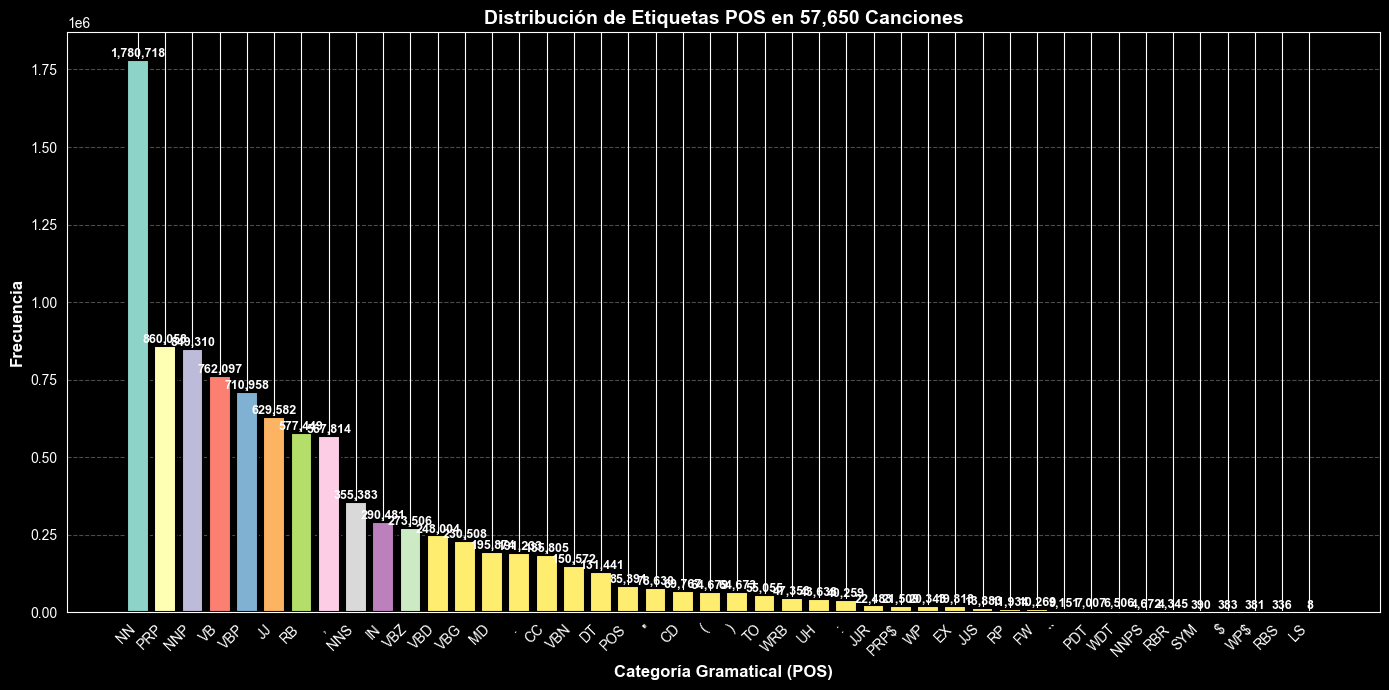


ESTADÍSTICAS DE POS TAGS

 Total de palabras (después de normalización): 9,693,656
 Tipos diferentes de POS tags: 44

 TOP 10 POS TAGS MÁS FRECUENTES:
 1. NN    → 1,780,718 ocurrencias (18.37%)
 2. PRP   →  860,058 ocurrencias ( 8.87%)
 3. NNP   →  849,310 ocurrencias ( 8.76%)
 4. VB    →  762,097 ocurrencias ( 7.86%)
 5. VBP   →  710,958 ocurrencias ( 7.33%)
 6. JJ    →  629,582 ocurrencias ( 6.49%)
 7. RB    →  577,449 ocurrencias ( 5.96%)
 8. ,     →  567,814 ocurrencias ( 5.86%)
 9. NNS   →  355,383 ocurrencias ( 3.67%)
10. IN    →  290,481 ocurrencias ( 3.00%)


In [16]:


# ============================================================================
# VISUALIZACIÓN DE DISTRIBUCIÓN DE POS TAGS
# ============================================================================

print("\n" + "="*80)
print("VISUALIZACIÓN DE DISTRIBUCIÓN DE POS TAGS")
print("="*80 + "\n")

# Recolectar TODOS los POS tags de todas las canciones
def extraer_todos_pos_tags(df, columna_pos='pos_tags_lemma'):
    """Extrae todos los POS tags del DataFrame"""
    todos_tags = []

    for pos_tags_list in df[columna_pos]:
        for sentence_tags in pos_tags_list:
            for word, tag in sentence_tags:
                todos_tags.append(tag)

    return todos_tags

# Extraer todos los tags
print("Extrayendo POS tags de todas las canciones...")
todos_pos_tags = extraer_todos_pos_tags(df, 'pos_tags_lemma')

# Contar frecuencias
pos_counts = Counter(todos_pos_tags)

# Ordenar por frecuencia (mayor a menor)
pos_counts_sorted = dict(sorted(pos_counts.items(), key=lambda x: x[1], reverse=True))

print(f"✓ Total de palabras analizadas: {len(todos_pos_tags):,}")
print(f"✓ Tipos de POS tags encontrados: {len(pos_counts)}")

# Visualización
fig, ax = plt.subplots(figsize=(14, 7))

pos_names = list(pos_counts_sorted.keys())
pos_values = list(pos_counts_sorted.values())

colors = plt.cm.Set3(range(len(pos_names)))
bars = ax.bar(pos_names, pos_values, color=colors, edgecolor='black', linewidth=1.5)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

ax.set_xlabel('Categoría Gramatical (POS)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax.set_title(f'Distribución de Etiquetas POS en {len(df):,} Canciones',
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Rotar etiquetas si hay muchas
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Mostrar estadísticas
print("\n" + "="*80)
print("ESTADÍSTICAS DE POS TAGS")
print("="*80)
print(f"\n Total de palabras (después de normalización): {len(todos_pos_tags):,}")
print(f" Tipos diferentes de POS tags: {len(pos_counts)}")

print("\n TOP 10 POS TAGS MÁS FRECUENTES:")
for i, (tag, count) in enumerate(list(pos_counts_sorted.items())[:10], 1):
    porcentaje = (count / len(todos_pos_tags)) * 100
    print(f"{i:2}. {tag:5} → {count:8,} ocurrencias ({porcentaje:5.2f}%)")

## Guardar Corpus

In [18]:
df.to_csv(directorio_proyecto+'\\data\\results\\corpus_spotify_nltk.csv', index=False)